In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv("penyakit_jantung.csv")

# akan menampilkan data awal
print("Data awal\n")
display(df)  

print("\nJumlah kolom dan baris:")
print("Jumlah kolom:", df.shape[1])
print("Jumlah baris:", df.shape[0])


Data awal



,Usia,Jenis_Kelamin,Tipe_Nyeri_Dada,Tekanan_Darah_Istirahat,Kolesterol,Gula_Darah_Puasa,Elektrokardiogram_Istirahat,HR_Max,Nyeri_Dada_Olahraga,Depresi_ST,Kemiringan_ST,Jumlah_Pembuluh_Besar,Thalassemia,Penyakit_Jantung
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,01/03/2025,0,0,3,0
2,70,1,0,145,174,0,1,125,1,06/02/2025,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,09/01/2025,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,08/02/2025,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0,2,0,2,1



Jumlah kolom dan baris:
Jumlah kolom: 14
Jumlah baris: 1025


In [4]:
df.info()

print("\nJumlah missing value per kolom:")
# mengecek jumlah missing value
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Usia                         1025 non-null   int64 
 1   Jenis_Kelamin                1025 non-null   int64 
 2   Tipe_Nyeri_Dada              1025 non-null   int64 
 3   Tekanan_Darah_Istirahat      1025 non-null   int64 
 4   Kolesterol                   1025 non-null   int64 
 5   Gula_Darah_Puasa             1025 non-null   int64 
 6   Elektrokardiogram_Istirahat  1025 non-null   int64 
 7   HR_Max                       1025 non-null   int64 
 8   Nyeri_Dada_Olahraga          1025 non-null   int64 
 9   Depresi_ST                   1025 non-null   object
 10  Kemiringan_ST                1025 non-null   int64 
 11  Jumlah_Pembuluh_Besar        1025 non-null   int64 
 12  Thalassemia                  1025 non-null   int64 
 13  Penyakit_Jantung             1025

In [5]:
# target
target = "Penyakit_Jantung"

In [10]:
# TRANSFORMASI DATA

# Cleaning Data
df = df.drop_duplicates()
df = df.fillna(0)

# Ubah tipe data
df['Usia'] = df['Usia'].astype(int)
df['Kolesterol'] = df['Kolesterol'].astype(float)

# Tangani kolom Depresi_ST yang ada tanggal
df['Depresi_ST'] = pd.to_numeric(df['Depresi_ST'], errors='coerce')
df['Depresi_ST'] = df['Depresi_ST'].fillna(df['Depresi_ST'].median())

# Normalisasi sederhana (skala lebih kecil)
df['Kolesterol'] = df['Kolesterol'] / 100
df['Tekanan_Darah_Istirahat'] = df['Tekanan_Darah_Istirahat'] / 100
df['HR_Max'] = df['HR_Max'] / 100

# Encode Jenis Kelamin (1 = Laki-laki, 0 = Perempuan)
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].map({1: 1, 0: 0})

df.to_csv("Penyakit_Jantung_Transformasi.csv", index=False)

print("Transformasi selesai! File disimpan sebagai Penyakit_Jantung_Transformasi.csv")
print(df.head())  # tampilkan 5 baris pertama

Transformasi selesai! File disimpan sebagai Penyakit_Jantung_Transformasi.csv
   Usia  Jenis_Kelamin  Tipe_Nyeri_Dada  Tekanan_Darah_Istirahat  Kolesterol  \
0    52              1                0                     1.25        2.12   
1    53              1                0                     1.40        2.03   
2    70              1                0                     1.45        1.74   
3    61              1                0                     1.48        2.03   
4    62              0                0                     1.38        2.94   

   Gula_Darah_Puasa  Elektrokardiogram_Istirahat  HR_Max  Nyeri_Dada_Olahraga  \
0                 0                            1    1.68                    0   
1                 1                            0    1.55                    1   
2                 0                            1    1.25                    1   
3                 0                            1    1.61                    0   
4                 1                 

In [11]:
# SELEKSI FITUR MENGGUNAKAN CHI-SQUARE
hasil_chi2 = []

for col in df.columns:
    if col != target:
        # tabel kontingensi antara fitur dan target
        contingency_table = pd.crosstab(df[col], df[target])
        
        # Hitung Chi-Square
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Simpan hasil
        hasil_chi2.append({
            "Fitur": col,
            "Chi-Square": chi2,
            "p-value": p,
            "Signifikan (<0.05)": "Ya" if p < 0.05 else "Tidak"
        })

chi2_df = pd.DataFrame(hasil_chi2)
chi2_df


,Fitur,Chi-Square,p-value,Signifikan (<0.05)
0,Usia,49.935485,1.349198e-01,Tidak
1,Jenis_Kelamin,23.083879,1.550855e-06,Ya
2,Tipe_Nyeri_Dada,80.978762,1.892684e-17,Ya
3,Tekanan_Darah_Istirahat,47.074226,5.107235e-01,Tidak
4,Kolesterol,172.171047,1.143890e-01,Tidak
5,Gula_Darah_Puasa,0.092408,7.611375e-01,Tidak
6,Elektrokardiogram_Istirahat,9.729682,7.713053e-03,Ya
7,HR_Max,109.525480,7.918632e-02,Tidak
8,Nyeri_Dada_Olahraga,55.456203,9.556466e-14,Ya
9,Depresi_ST,55.021704,8.583946e-07,Ya


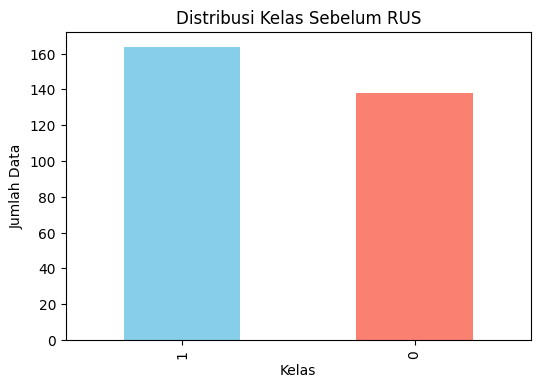

Jumlah data sebelum RUS:
  Kelas 1: 164
  Kelas 0: 138


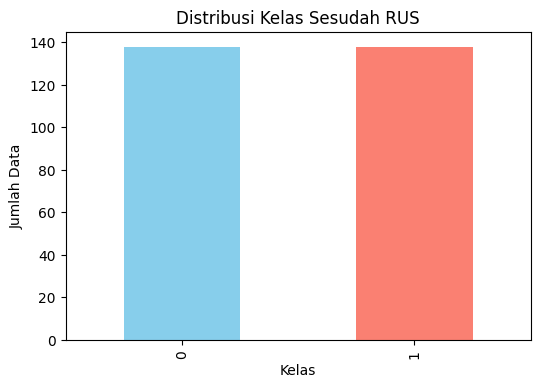


Jumlah data sesudah RUS:
  Kelas 0: 138
  Kelas 1: 138


In [13]:
#IMBALANCED DATA (RUS)
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv("penyakit_jantung_Transformasi.csv")
target = "Penyakit_Jantung"

X = df.drop(columns=[target])
y = df[target]

before_counts = y.value_counts()

plt.figure(figsize=(6,4))
before_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribusi Kelas Sebelum RUS")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

print("Jumlah data sebelum RUS:")
for kelas, jumlah in before_counts.items():
    print(f"  Kelas {kelas}: {jumlah}")

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

after_counts = y_res.value_counts()

plt.figure(figsize=(6,4))
after_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribusi Kelas Sesudah RUS")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

print("\nJumlah data sesudah RUS:")
for kelas, jumlah in after_counts.items():
    print(f"  Kelas {kelas}: {jumlah}")
